In [37]:
import pandas as pd
import seaborn as sns

import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

In [6]:
control_data = pd.read_csv("control_group.csv", sep = ";")

In [7]:
control_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
test_data = pd.read_csv("test_group.csv", sep = ";")

In [9]:
test_data.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [10]:
control_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [12]:
control_data.shape

(30, 10)

In [13]:
test_data.shape

(30, 10)

In [14]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [15]:
control_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
test_data.columns = ["Campaign Name", "Date", "Amount Spent", 
                        "Number of Impressions", "Reach", "Website Clicks", 
                        "Searches Received", "Content Viewed", "Added to Cart",
                        "Purchases"]

In [17]:
test_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [18]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [19]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [20]:
control_data['Number of Impressions'].fillna(value=control_data['Number of Impressions'].mean(), inplace=True)

In [21]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [22]:
control_data['Reach'].fillna(value=control_data['Reach'].mean(), inplace=True)

In [23]:
control_data['Website Clicks'].fillna(value=control_data['Website Clicks'].mean(), inplace=True)

In [24]:
control_data['Searches Received'].fillna(value=control_data['Searches Received'].mean(), inplace=True)

In [25]:
control_data['Content Viewed'].fillna(value=control_data['Content Viewed'].mean(), inplace=True)

In [26]:
control_data['Added to Cart'].fillna(value=control_data['Added to Cart'].mean(), inplace=True)

In [27]:
control_data['Purchases'].fillna(value=control_data['Purchases'].mean(), inplace=True)

In [28]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [32]:
ab_data = control_data.merge(test_data,how="outer").sort_values(["Date"])

In [30]:
control_data = control_data.astype({"Number of Impressions":'int', "Reach":'int',"Website Clicks":'int',"Searches Received":'int',"Content Viewed":'int',"Added to Cart":'int',"Purchases":'int'})

In [31]:
control_data.dtypes

Campaign Name            object
Date                     object
Amount Spent              int64
Number of Impressions     int32
Reach                     int32
Website Clicks            int32
Searches Received         int32
Content Viewed            int32
Added to Cart             int32
Purchases                 int32
dtype: object

In [33]:
ab_data = ab_data.reset_index(drop=True)

In [34]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
2,Test Campaign,10.08.2019,2790,95054,79632,8125,2312,1804,424,275
3,Control Campaign,10.08.2019,2149,117624,91257,2277,2475,1984,1629,734
4,Test Campaign,11.08.2019,2420,83633,71286,3750,2893,2617,1075,668


In [35]:
ab_data['Campaign Name'].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

In [39]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

In [41]:
sum_control = sum(control_data["Searches Received"])
sum_test = sum(test_data["Searches Received"])

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
count = [sum_control,sum_test]

In [44]:
label = ["Total Searches from Control Campaign", 
         "Total Searches from Test Campaign"]

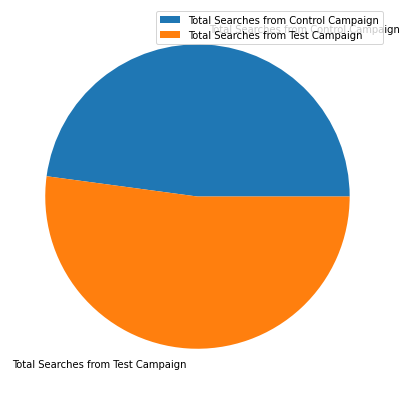

In [46]:
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = label )
 
plt.legend()
plt.show()

In [48]:
web_control = sum(control_data["Website Clicks"])
web_test = sum(test_data["Website Clicks"])

In [51]:
web_count = [web_control, web_test]

In [52]:
label = ["Total Website Clicks from Control Campaign", 
         "Total Website Clicks from Test Campaign"]

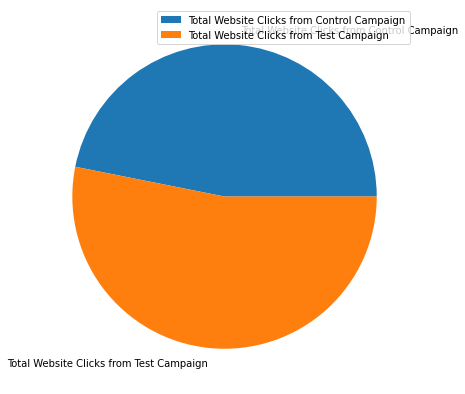

In [54]:
fig = plt.figure(figsize =(10, 7))
plt.pie(web_count, labels = label )
 
plt.legend()
plt.show()

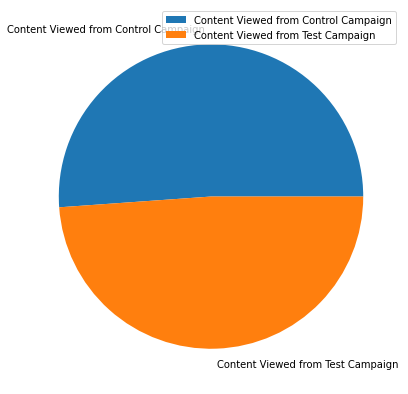

In [58]:
label = ["Content Viewed from Control Campaign", 
         "Content Viewed from Test Campaign"]
content_counts = [sum(control_data["Content Viewed"]), 
          sum(test_data["Content Viewed"])]

fig = plt.figure(figsize =(10, 7))
plt.pie(content_counts, labels = label )
 
plt.legend()
plt.show()

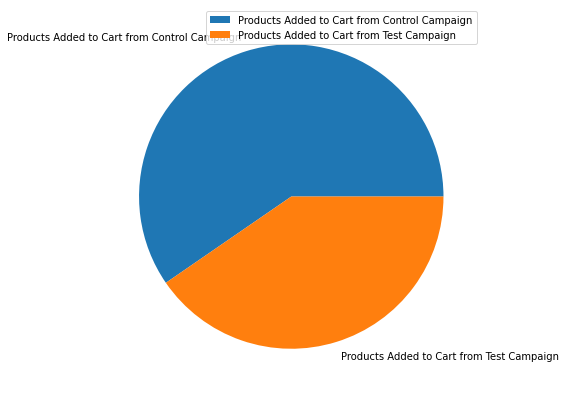

In [59]:
label = ["Products Added to Cart from Control Campaign", 
         "Products Added to Cart from Test Campaign"]
prod_counts = [sum(control_data["Added to Cart"]), 
          sum(test_data["Added to Cart"])]

fig = plt.figure(figsize =(10, 7))
plt.pie(prod_counts, labels = label )
 
plt.legend()
plt.show()

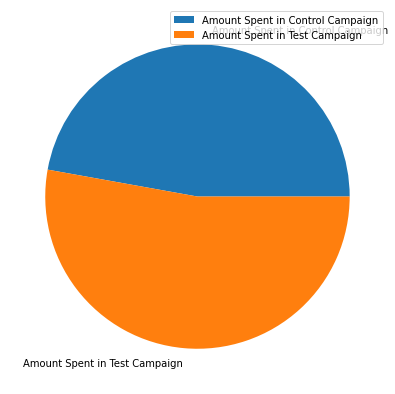

In [60]:
label = ["Amount Spent in Control Campaign", 
         "Amount Spent in Test Campaign"]
amount_counts = [sum(control_data["Amount Spent"]), 
          sum(test_data["Amount Spent"])]

fig = plt.figure(figsize =(10, 7))
plt.pie(amount_counts, labels = label )
 
plt.legend()
plt.show()

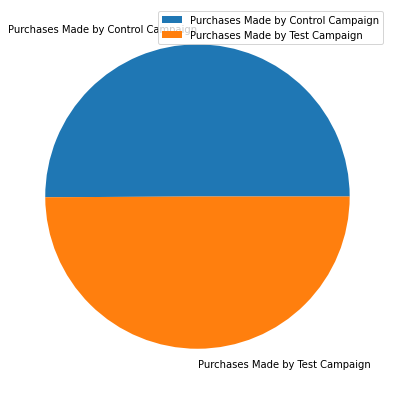

In [61]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
purchase_counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]

fig = plt.figure(figsize =(10, 7))
plt.pie(purchase_counts, labels = label )
 
plt.legend()
plt.show()

In [63]:
label = ["Purchases Made by Control Campaign", 
         "Purchases Made by Test Campaign"]
counts = [sum(control_data["Purchases"]), 
          sum(test_data["Purchases"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Purchases')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, line=dict(color = 'black', width = 3)))
fig.show()         

[]

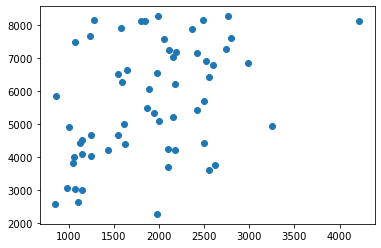

In [71]:
plt.scatter(data=ab_data, x = 'Content Viewed', y = 'Website Clicks')
plt.plot()

In [73]:
figure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name",
                    trendline='ols')
figure.show()             

In [74]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name",
                    trendline='ols')
figure.show()
             

In [75]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name",
                    trendline='ols')
figure.show()
              

From above tests we find out that, control campaign resulted in more sales and engaggement. But the conversion rate from cart to purchase is high in test campaign.So, the Test campaign can be used to market a specific product to a specific audience, and the Control campaign can be used to market multiple products to a wider audience.